<a href="https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/keras_ocr_custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras OCR
A packaged and flexible version of the CRAFT text detector and Keras CRNN recognition model

based on the project https://github.com/faustomorales/keras-ocr

> Colab by [mrm8488](https://twitter.com/mrm8488)



In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
!pip install keras-ocr

In [0]:
import matplotlib.pyplot as plt
import keras_ocr
import os

In [0]:
# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

In [0]:
!mkdir uploads

## Upload files (images with text) form your local filesystem

In [0]:
# IMPORTANT! If the execution of this cell fails, JUST EXECUTE IT AGAIN!
from google.colab import files

uploaded = files.upload()
uploaded_files = list(uploaded.keys())
for uploaded_file in uploaded_files:
  print(uploaded_file)
  !mv $uploaded_file uploads/$uploaded_file

In [7]:
uploads_dir = "/content/uploads"
custom_images = []

for filename in os.listdir(uploads_dir):
    print(os.path.join(uploads_dir, filename))
    custom_images.append(os.path.join(uploads_dir, filename))

images = [ keras_ocr.tools.read(path) for path in custom_images]

/content/uploads/documentpdf.png
/content/uploads/acoustic-ml-min.png


In [8]:
# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
%time predictions = pipeline.recognize(images)

CPU times: user 12.5 s, sys: 5.55 s, total: 18.1 s
Wall time: 18.2 s


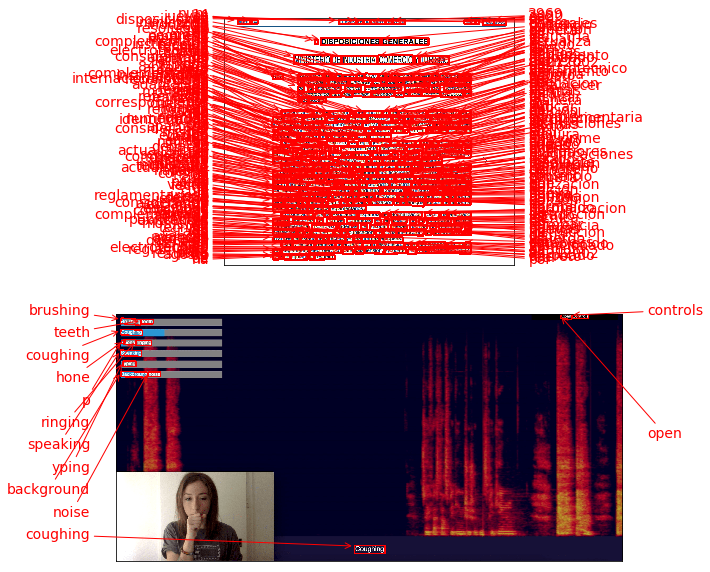

In [10]:
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 10))
if(len(custom_images) == 1):
  for image, prediction in zip(images, predictions):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=axs)
else:
  for ax, image, prediction in zip(axs, images, predictions):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=ax)

In [25]:
with open('results.txt', 'a+') as f:
  for idx, prediction in enumerate(predictions):
    if(idx != 0):
      print("\n")
      f.write("\n\n")
    print("Results for the file: " + os.path.basename(custom_images[idx]))
    f.write("Results for the file: " + os.path.basename(custom_images[idx]) + ":\n\n")
    for word, array in prediction:
      if word == "\n":
        print("\n")
        f.write("\n")
      else:
        print(word,  end = ' ')
        f.write(word + " ")

Results for the file: documentpdf.png
num 14 jueves 16 2020 sec pag 3969 de de l enero disposiciones generales l ministerio de industria comercio y turismo resolucion 2020 direccion general 612 de 9 de de de la de industria de enero y pequena la mediana empresa la actualiza el listado de por que se normas y itcbto2 de instruccion tecnica complementaria del reglamento la electrotecnico baja tension aprobado el real decreto 84212002 de para por 2 de agosto considerando del electrotecnico apartado del articulo 26 reglamento el 1 que para tension 84212002 baja aprobado real decreto de 2 de agosto estipula clas por que aplicacion instrucciones tecnicas complementarias podran establecer de une la normas otras reconocidas internacionalmente de total parcial fin de facilitar la manera u o a adaptacion al estado de tecnica cada momento la en dicha referencia realizara sin indicar ano de edicion de regla general ell las se por instruccion cuestion en correspondiente tecnica complementaria la nor

In [0]:
files.download("results.txt")